In [1]:
import pandas as pd
import seaborn as sns
import paretoset

In [21]:
data = pd.read_csv("out3.csv")
data

,person_key,result,score_basic,score_wh,method,experiment,instance,group
0,Carl-gpt35,Splendor,3.0,9.0,mediator,board_games,c716cb6e3d49483fb2e2da4941fcd8ee,"Carl-gpt35,Emma-gpt35"
1,Emma-gpt35,Splendor,9.0,9.0,mediator,board_games,c716cb6e3d49483fb2e2da4941fcd8ee,"Carl-gpt35,Emma-gpt35"
2,Carl-gpt35,7 Wonders,3.0,9.0,mediator,board_games,18c1fbe4281345d4b35692d26932391c,"Carl-gpt35,Emma-gpt35"
3,Emma-gpt35,7 Wonders,8.0,10.0,mediator,board_games,18c1fbe4281345d4b35692d26932391c,"Carl-gpt35,Emma-gpt35"
4,Carl-gpt35,Sushi Go!,8.0,10.0,direct,board_games,0a596009efe04041a7b17ccc0e630db7,"Carl-gpt35,Emma-gpt35"
5,Emma-gpt35,Sushi Go!,8.0,9.0,direct,board_games,0a596009efe04041a7b17ccc0e630db7,"Carl-gpt35,Emma-gpt35"
6,Carl-gpt35,Azul,6.0,8.0,direct,board_games,d00b3465da5a4ff0b310bd06d0010c45,"Carl-gpt35,Emma-gpt35"
7,Emma-gpt35,Azul,9.0,9.0,direct,board_games,d00b3465da5a4ff0b310bd06d0010c45,"Carl-gpt35,Emma-gpt35"
8,Emma-gpt35,7 Wonders,9.0,9.0,mediator,board_games,e06b84b71d244bdfa061e4fdb0bb78cb,"Emma-gpt35,Carl-gpt35"
9,Carl-gpt35,7 Wonders,5.0,9.0,mediator,board_games,e06b84b71d244bdfa061e4fdb0bb78cb,"Emma-gpt35,Carl-gpt35"


In [22]:
result = []
for instance in data["instance"].unique():
    t = data[data.instance == instance]
    s = t.sort_values("person_key")
    x = s.drop(["score_basic", "person_key"], axis=1).iloc[0]
    x["score_x"] = s.iloc[0]["score_basic"]
    x["score_y"] = s.iloc[1]["score_basic"]
    x["key"] = ",".join(sorted(s.iloc[0]["group"].split(",")))
    result.append(x)
scores = pd.DataFrame(result)
scores

,result,score_wh,method,experiment,instance,group,score_x,score_y,key
0,Splendor,9.0,mediator,board_games,c716cb6e3d49483fb2e2da4941fcd8ee,"Carl-gpt35,Emma-gpt35",3.0,9.0,"Carl-gpt35,Emma-gpt35"
2,7 Wonders,9.0,mediator,board_games,18c1fbe4281345d4b35692d26932391c,"Carl-gpt35,Emma-gpt35",3.0,8.0,"Carl-gpt35,Emma-gpt35"
4,Sushi Go!,10.0,direct,board_games,0a596009efe04041a7b17ccc0e630db7,"Carl-gpt35,Emma-gpt35",8.0,8.0,"Carl-gpt35,Emma-gpt35"
6,Azul,8.0,direct,board_games,d00b3465da5a4ff0b310bd06d0010c45,"Carl-gpt35,Emma-gpt35",6.0,9.0,"Carl-gpt35,Emma-gpt35"
9,7 Wonders,9.0,mediator,board_games,e06b84b71d244bdfa061e4fdb0bb78cb,"Emma-gpt35,Carl-gpt35",5.0,9.0,"Carl-gpt35,Emma-gpt35"
11,Azul,9.0,mediator,board_games,3c5c925cb9e64b278c5fac72477d4a9b,"Emma-gpt35,Carl-gpt35",5.0,9.0,"Carl-gpt35,Emma-gpt35"
13,Santorini,9.0,direct,board_games,3d6eb2a103a04776a45ce006d2103358,"Emma-gpt35,Carl-gpt35",5.0,10.0,"Carl-gpt35,Emma-gpt35"
15,Santorini,9.0,direct,board_games,61344cecc16c420790214ad73c58d173,"Emma-gpt35,Carl-gpt35",8.0,10.0,"Carl-gpt35,Emma-gpt35"


In [19]:
# def pareto_f(x):
#     x = x.copy()        
#     x["pareto"] = paretoset.paretoset(x[["score_x", "score_y"]], ["max", "max"])
#     return x

# scores2 = scores.groupby(["key", "method"]).apply(pareto_f, include_groups=False).reset_index()

      method  score_x  score_y  pareto
15    direct      8.0     10.0    True
4     direct      8.0      8.0   False
6     direct      6.0      9.0   False
13    direct      5.0     10.0   False
9   mediator      5.0      9.0    True
11  mediator      5.0      9.0   False
0   mediator      3.0      9.0   False
2   mediator      3.0      8.0   False


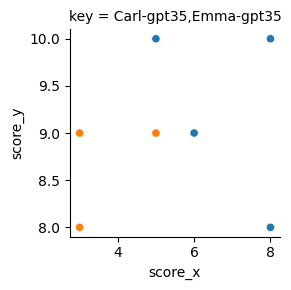

In [23]:
def draw_f(color, data):
    data = data.copy()
    data = data.sort_values(["score_x", "score_y"], ascending=False)
    sns.scatterplot(data=data, x="score_x", y="score_y", hue="method")

    prev = {}
    pareto = []
    for x, row in data.iterrows():
        p = prev.get(row.method, (0, 0))
        if row.score_x > p[0] or row.score_y > p[1]:
            pareto.append(True)
            prev[row.method] = (row.score_x, row.score_y)        
        else:
            pareto.append(False)
    data["pareto"] = pareto
    print(data[["method", "score_x", "score_y", "pareto"]])
    sns.lineplot(data=data[pareto], x="score_x", y="score_y", hue="method", errorbar=None)    

sns.FacetGrid(data=scores, row="key").map_dataframe(draw_f)

(0.0, 10.0)

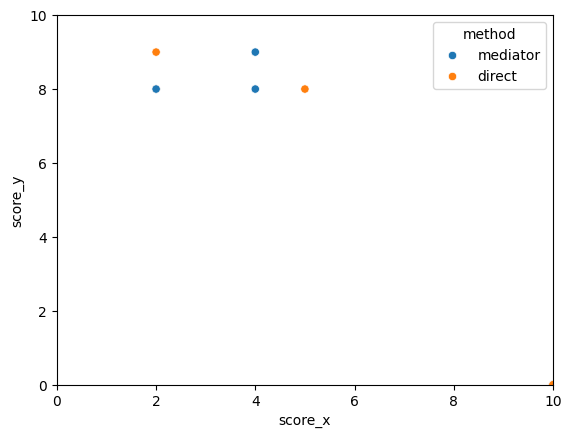

In [10]:

g = sns.scatterplot(data=scores, x="score_x", y="score_y", hue="method")
g.set_ylim(0, 10)
g.set_xlim(0, 10)

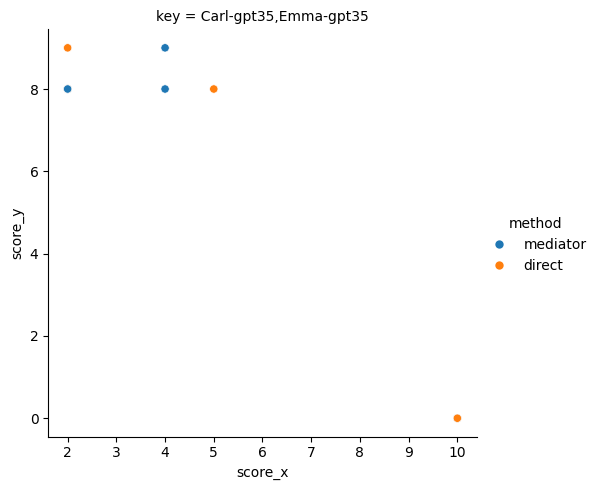

In [11]:
sns.relplot(
    data=scores, x="score_x", y="score_y", hue="method",
    row="key",
    kind="scatter",    
)